In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import scipy.stats

## 1. Encoder self-attention

28104.0


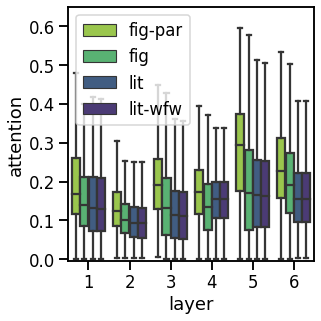

28104.0


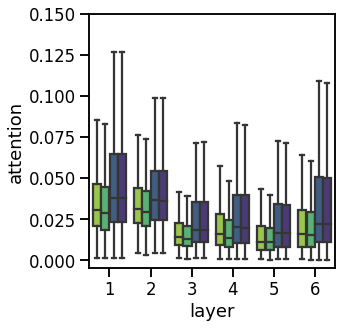

28104.0


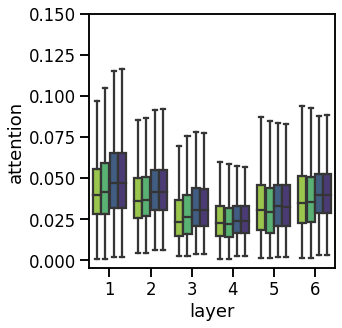

8804.0


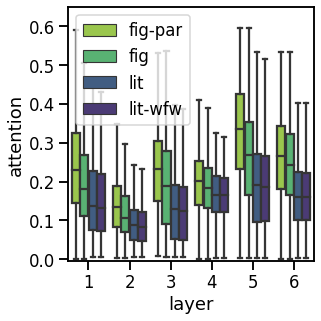

8804.0


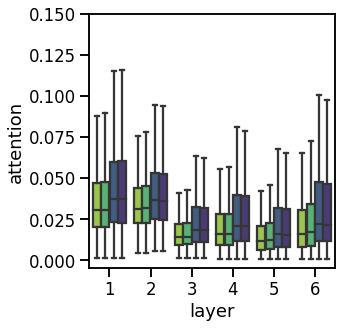

8804.0


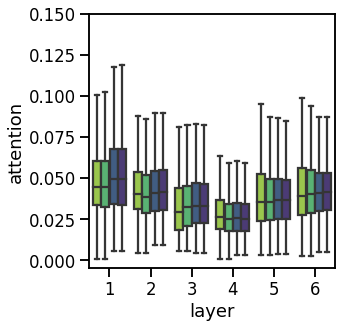

13021.0


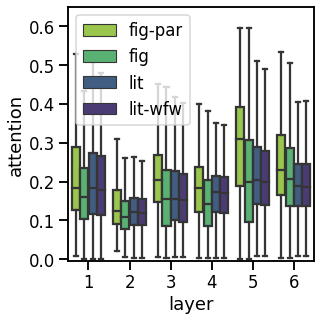

13021.0


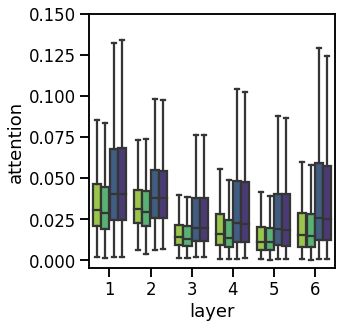

13021.0


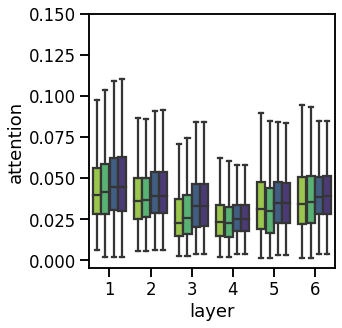

In [2]:
sns.set_context("talk")
sns.set_style({'legend.frameon': False})
colors = sns.color_palette("viridis", 6)
for input_file in ["data/attention.pickle", "data/attention_subset=intersection.pickle",
                   "data/attention_subset=identical.pickle"]:
    per_setup = pickle.load(open(input_file, 'rb'))
    setups = [("figurative", "paraphrase"), "figurative", "literal", ("literal", "word-by-word")]
    labels = ["fig-par", "fig", "lit", "lit-wfw"]

    for graph, maxi in [("idi2idi", 0.65), ("idi2con", 0.15), ("con2idi", 0.15)]:
        fig = plt.figure(figsize=(4.5, 4.5))
        data, layers, hue = [], [], []

        for i, setup in enumerate(setups):
            data.extend([x for l in range(6) for x in per_setup[l][graph][setup]])
            layers.extend([l for l in range(6) for x in per_setup[l][graph][setup]])
            hue.extend([labels[i] for l in range(6) for x in per_setup[l][graph][setup]])
        print((len([x for l in range(6) for x in per_setup[l][graph]["figurative"]]) + \
               len([x for l in range(6) for x in per_setup[l][graph]["literal"]]))/6)
        ax = sns.boxplot(x=layers, y=data, hue=hue,
                         palette=[colors[-1], colors[-2], colors[1], colors[0]],
                         fliersize=0)

        plt.tight_layout()
        if graph == "idi2idi":
            plt.legend(loc='upper left') #bbox_to_anchor=(0.1, 0.75))
        else:
            plt.legend([],[], frameon=False)
        ax.set_xticks([0, 1, 2, 3, 4, 5])
        ax.set_xticklabels([1, 2, 3, 4, 5, 6])
        plt.xlabel("layer")
        plt.ylabel("attention")
        plt.ylim(-0.005, maxi)
        plt.savefig(input_file.replace("data", "figures").replace(".pickle", "") + f"_{graph}.pdf", bbox_inches="tight")
        plt.show()

## 2. Cross-attention

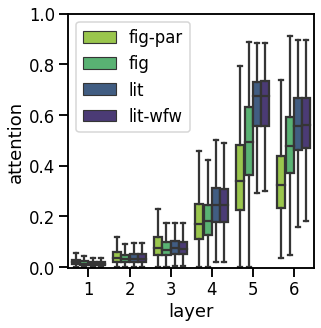

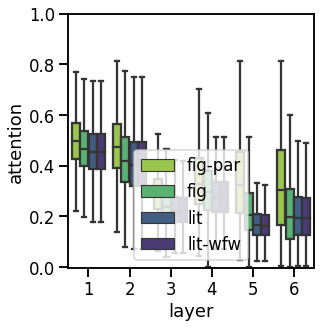

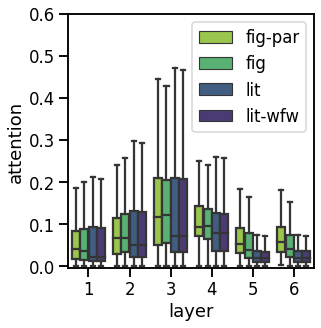

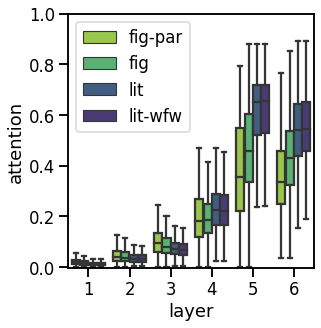

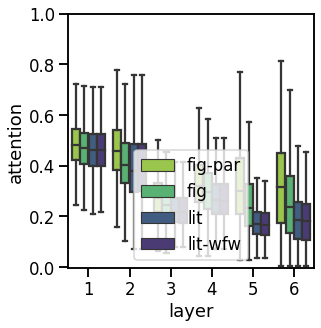

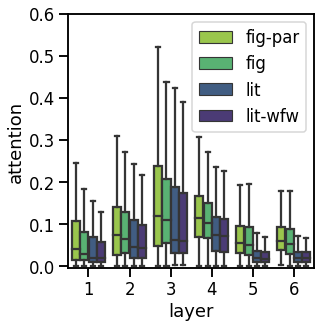

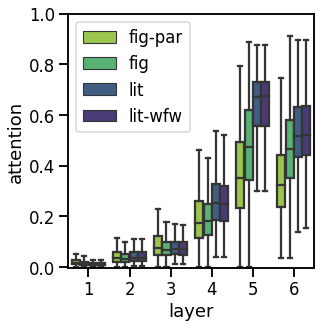

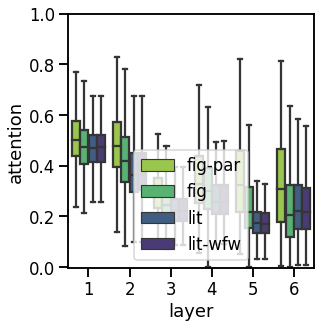

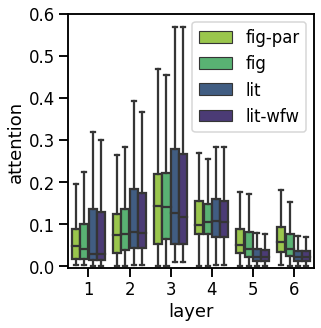

In [3]:
sns.set_context("talk")
sns.set_style({'legend.frameon': False})
colors = sns.color_palette("viridis", 6)

for input_file in ["data/cross_attention.pickle", "data/cross_attention_subset=intersection.pickle",
                   "data/cross_attention_subset=identical.pickle"]:
    per_setup = pickle.load(open(input_file, 'rb'))
    for graph, maxi in [("idi2idi", 1), ("idi2eos", 1), ("idi2con", 0.6)]:
        fig = plt.figure(figsize=(4.5, 4.5))
        data, layers, hue = [], [], []
        for i, setup in enumerate(setups):
            data.extend([x for l in range(6) for x in per_setup[l][graph][setup]])
            layers.extend([l for l in range(6) for x in per_setup[l][graph][setup]])
            hue.extend([labels[i] for l in range(6) for x in per_setup[l][graph][setup]])

        ax = sns.boxplot(x=layers, y=data, hue=hue,
                         palette=[colors[-1], colors[-2], colors[1], colors[0]],
                         fliersize=0)
        plt.tight_layout()
        #plt.legend([],[], frameon=False)
        ax.set_xticks([0, 1, 2, 3, 4, 5])
        ax.set_xticklabels([1, 2, 3, 4, 5, 6])
        plt.xlabel("layer")
        plt.ylabel("attention")
        plt.ylim(-0.005, maxi)
        plt.savefig(input_file.replace("data", "figures").replace(".pickle", "") + f"_{graph}.pdf", bbox_inches="tight")
        plt.show()

## 3. Comparison to WSD

3789.0


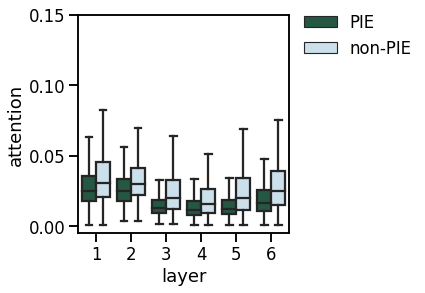

In [4]:
per_setup = pickle.load(open("data/attention_wsd_comparison.pickle", 'rb'))
sns.set_context("talk")
sns.set_style({'legend.frameon': False})
colors = sns.color_palette("cubehelix", 6)

fig = plt.figure(figsize=(4, 4))
data, layers, hue = [], [], []
data.extend([x for l in range(6) for x in per_setup[l]["attention, pie"]])
layers.extend([l for l in range(6) for x in per_setup[l]["attention, pie"]])
hue.extend(["PIE" for l in range(6) for x in per_setup[l]["attention, pie"]])
data.extend([x for l in range(6) for x in per_setup[l]["attention, non_pie"]])
layers.extend([l for l in range(6) for x in per_setup[l]["attention, non_pie"]])
hue.extend(["non-PIE" for l in range(6) for x in per_setup[l]["attention, non_pie"]])
print((len([x for l in range(6) for x in per_setup[l]["attention, non_pie"]])/6))
ax = sns.boxplot(x=layers, y=data, hue=hue, palette=[colors[1], colors[-1]], fliersize=0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1.075), frameon=False)
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels([1, 2, 3, 4, 5, 6])
plt.xlabel("layer")
plt.ylabel("attention")
plt.ylim(-0.005, 0.15)
plt.savefig(f"figures/attention_wsd_comparison.pdf", bbox_inches="tight")
plt.show()

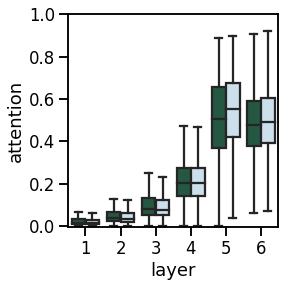

In [5]:
per_setup = pickle.load(open("data/cross_attention_wsd_comparison.pickle", 'rb'))
fig = plt.figure(figsize=(4, 4))
data, layers, hue = [], [], []
data.extend([x for l in range(6) for x in per_setup[l]["cross-attention, pie"]])
layers.extend([l for l in range(6) for x in per_setup[l]["cross-attention, pie"]])
hue.extend(["PIE" for l in range(6) for x in per_setup[l]["cross-attention, pie"]])
data.extend([x for l in range(6) for x in per_setup[l]["cross-attention, non_pie"]])
layers.extend([l for l in range(6) for x in per_setup[l]["cross-attention, non_pie"]])
hue.extend(["non-PIE" for l in range(6) for x in per_setup[l]["cross-attention, non_pie"]])

ax = sns.boxplot(x=layers, y=data, hue=hue, palette=[colors[1], colors[-1]], fliersize=0)
plt.tight_layout()
plt.legend([],[], frameon=False)
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels([1, 2, 3, 4, 5, 6])
plt.xlabel("layer")
plt.ylabel("attention")
plt.ylim(-0.005, 1)
plt.savefig(f"figures/cross_attention_wsd_comparison.pdf", bbox_inches="tight")
plt.show()